In [1]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
def extract_feature(file_name, mfcc, chroma, mel):
  with soundfile.SoundFile(file_name) as sound_file:
    X = sound_file.read(dtype="float32")
    sample_rate=sound_file.samplerate
    if chroma:
      stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
      mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
      result=np.hstack((result, mfccs))
    if chroma:
      chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
      result=np.hstack((result, chroma))
    if mel:
      mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
      result=np.hstack((result, mel))
  return result

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
emotions = {
  '01': 'anger',
  '02': 'clear',
  '03': 'loud',
  '04': 'neutral',
  '05': 'sad',
}

observed_emotions = ['anger', 'clear', 'loud', 'neutral', 'sad']

In [5]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob('C:/Users/chinn/Desktop/speech_processing_project_1/paper/speech_train/*.sph'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[0]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size)


In [6]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [7]:
print((x_train.shape[0], x_test.shape[0]))

(75, 25)


In [8]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


MLP Classfier

In [9]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [10]:
def training():
    model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
    model.fit(x_train,y_train)
    return model

In [11]:
accuracy = 0
epoach = 0;
while(accuracy*100 != 80.0):
    model = training()
    epoach = epoach +1
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
    print("No Of Epochs:",epoach,end='\t')
    print("Accracy for Each Epoach",accuracy*100)
if(accuracy!=0):
    print("Accuracy: {:.2f}%".format(accuracy*100))

No Of Epochs: 1	Accracy for Each Epoach 44.0
No Of Epochs: 2	Accracy for Each Epoach 52.0
No Of Epochs: 3	Accracy for Each Epoach 60.0
No Of Epochs: 4	Accracy for Each Epoach 48.0
No Of Epochs: 5	Accracy for Each Epoach 60.0
No Of Epochs: 6	Accracy for Each Epoach 52.0
No Of Epochs: 7	Accracy for Each Epoach 52.0
No Of Epochs: 8	Accracy for Each Epoach 44.0
No Of Epochs: 9	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 10	Accracy for Each Epoach 64.0
No Of Epochs: 11	Accracy for Each Epoach 48.0
No Of Epochs: 12	Accracy for Each Epoach 48.0
No Of Epochs: 13	Accracy for Each Epoach 44.0
No Of Epochs: 14	Accracy for Each Epoach 60.0
No Of Epochs: 15	Accracy for Each Epoach 60.0
No Of Epochs: 16	Accracy for Each Epoach 40.0
No Of Epochs: 17	Accracy for Each Epoach 48.0
No Of Epochs: 18	Accracy for Each Epoach 40.0
No Of Epochs: 19	Accracy for Each Epoach 52.0
No Of Epochs: 20	Accracy for Each Epoach 52.0
No Of Epochs: 21	Accracy for Each Epoach 44.0
No Of Epochs: 22	Accracy for E

No Of Epochs: 173	Accracy for Each Epoach 48.0
No Of Epochs: 174	Accracy for Each Epoach 76.0
No Of Epochs: 175	Accracy for Each Epoach 60.0
No Of Epochs: 176	Accracy for Each Epoach 48.0
No Of Epochs: 177	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 178	Accracy for Each Epoach 48.0
No Of Epochs: 179	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 180	Accracy for Each Epoach 60.0
No Of Epochs: 181	Accracy for Each Epoach 48.0
No Of Epochs: 182	Accracy for Each Epoach 52.0
No Of Epochs: 183	Accracy for Each Epoach 52.0
No Of Epochs: 184	Accracy for Each Epoach 60.0
No Of Epochs: 185	Accracy for Each Epoach 44.0
No Of Epochs: 186	Accracy for Each Epoach 52.0
No Of Epochs: 187	Accracy for Each Epoach 64.0
No Of Epochs: 188	Accracy for Each Epoach 52.0
No Of Epochs: 189	Accracy for Each Epoach 52.0
No Of Epochs: 190	Accracy for Each Epoach 36.0
No Of Epochs: 191	Accracy for Each Epoach 52.0
No Of Epochs: 192	Accracy for Each Epoach 48.0
No Of Epochs: 193	Accracy for Each

No Of Epochs: 340	Accracy for Each Epoach 52.0
No Of Epochs: 341	Accracy for Each Epoach 60.0
No Of Epochs: 342	Accracy for Each Epoach 44.0
No Of Epochs: 343	Accracy for Each Epoach 60.0
No Of Epochs: 344	Accracy for Each Epoach 48.0
No Of Epochs: 345	Accracy for Each Epoach 48.0
No Of Epochs: 346	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 347	Accracy for Each Epoach 48.0
No Of Epochs: 348	Accracy for Each Epoach 44.0
No Of Epochs: 349	Accracy for Each Epoach 44.0
No Of Epochs: 350	Accracy for Each Epoach 48.0
No Of Epochs: 351	Accracy for Each Epoach 52.0
No Of Epochs: 352	Accracy for Each Epoach 48.0
No Of Epochs: 353	Accracy for Each Epoach 60.0
No Of Epochs: 354	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 355	Accracy for Each Epoach 48.0
No Of Epochs: 356	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 357	Accracy for Each Epoach 64.0
No Of Epochs: 358	Accracy for Each Epoach 44.0
No Of Epochs: 359	Accracy for Each Epoach 52.0
No Of Epochs: 360	Acc

No Of Epochs: 507	Accracy for Each Epoach 52.0
No Of Epochs: 508	Accracy for Each Epoach 60.0
No Of Epochs: 509	Accracy for Each Epoach 60.0
No Of Epochs: 510	Accracy for Each Epoach 44.0
No Of Epochs: 511	Accracy for Each Epoach 44.0
No Of Epochs: 512	Accracy for Each Epoach 52.0
No Of Epochs: 513	Accracy for Each Epoach 52.0
No Of Epochs: 514	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 515	Accracy for Each Epoach 52.0
No Of Epochs: 516	Accracy for Each Epoach 44.0
No Of Epochs: 517	Accracy for Each Epoach 52.0
No Of Epochs: 518	Accracy for Each Epoach 52.0
No Of Epochs: 519	Accracy for Each Epoach 76.0
No Of Epochs: 520	Accracy for Each Epoach 64.0
No Of Epochs: 521	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 522	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 523	Accracy for Each Epoach 52.0
No Of Epochs: 524	Accracy for Each Epoach 52.0
No Of Epochs: 525	Accracy for Each Epoach 52.0
No Of Epochs: 526	Accracy for Each Epoach 60.0
No Of Epochs: 527	Acc

No Of Epochs: 673	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 674	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 675	Accracy for Each Epoach 48.0
No Of Epochs: 676	Accracy for Each Epoach 52.0
No Of Epochs: 677	Accracy for Each Epoach 60.0
No Of Epochs: 678	Accracy for Each Epoach 48.0
No Of Epochs: 679	Accracy for Each Epoach 60.0
No Of Epochs: 680	Accracy for Each Epoach 44.0
No Of Epochs: 681	Accracy for Each Epoach 60.0
No Of Epochs: 682	Accracy for Each Epoach 52.0
No Of Epochs: 683	Accracy for Each Epoach 48.0
No Of Epochs: 684	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 685	Accracy for Each Epoach 48.0
No Of Epochs: 686	Accracy for Each Epoach 60.0
No Of Epochs: 687	Accracy for Each Epoach 48.0
No Of Epochs: 688	Accracy for Each Epoach 40.0
No Of Epochs: 689	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 690	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 691	Accracy for Each Epoach 52.0
No Of Epochs: 692	Accracy for Each Epoach 

No Of Epochs: 839	Accracy for Each Epoach 36.0
No Of Epochs: 840	Accracy for Each Epoach 48.0
No Of Epochs: 841	Accracy for Each Epoach 60.0
No Of Epochs: 842	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 843	Accracy for Each Epoach 52.0
No Of Epochs: 844	Accracy for Each Epoach 52.0
No Of Epochs: 845	Accracy for Each Epoach 52.0
No Of Epochs: 846	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 847	Accracy for Each Epoach 48.0
No Of Epochs: 848	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 849	Accracy for Each Epoach 52.0
No Of Epochs: 850	Accracy for Each Epoach 64.0
No Of Epochs: 851	Accracy for Each Epoach 60.0
No Of Epochs: 852	Accracy for Each Epoach 52.0
No Of Epochs: 853	Accracy for Each Epoach 60.0
No Of Epochs: 854	Accracy for Each Epoach 52.0
No Of Epochs: 855	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 856	Accracy for Each Epoach 52.0
No Of Epochs: 857	Accracy for Each Epoach 40.0
No Of Epochs: 858	Accracy for Each Epoach 44.0
No Of Ep

No Of Epochs: 1006	Accracy for Each Epoach 64.0
No Of Epochs: 1007	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1008	Accracy for Each Epoach 48.0
No Of Epochs: 1009	Accracy for Each Epoach 40.0
No Of Epochs: 1010	Accracy for Each Epoach 52.0
No Of Epochs: 1011	Accracy for Each Epoach 64.0
No Of Epochs: 1012	Accracy for Each Epoach 52.0
No Of Epochs: 1013	Accracy for Each Epoach 44.0
No Of Epochs: 1014	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1015	Accracy for Each Epoach 52.0
No Of Epochs: 1016	Accracy for Each Epoach 60.0
No Of Epochs: 1017	Accracy for Each Epoach 52.0
No Of Epochs: 1018	Accracy for Each Epoach 52.0
No Of Epochs: 1019	Accracy for Each Epoach 52.0
No Of Epochs: 1020	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1021	Accracy for Each Epoach 48.0
No Of Epochs: 1022	Accracy for Each Epoach 48.0
No Of Epochs: 1023	Accracy for Each Epoach 48.0
No Of Epochs: 1024	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1025	Accracy for Each 

No Of Epochs: 1169	Accracy for Each Epoach 44.0
No Of Epochs: 1170	Accracy for Each Epoach 44.0
No Of Epochs: 1171	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1172	Accracy for Each Epoach 48.0
No Of Epochs: 1173	Accracy for Each Epoach 52.0
No Of Epochs: 1174	Accracy for Each Epoach 60.0
No Of Epochs: 1175	Accracy for Each Epoach 44.0
No Of Epochs: 1176	Accracy for Each Epoach 52.0
No Of Epochs: 1177	Accracy for Each Epoach 60.0
No Of Epochs: 1178	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1179	Accracy for Each Epoach 48.0
No Of Epochs: 1180	Accracy for Each Epoach 48.0
No Of Epochs: 1181	Accracy for Each Epoach 44.0
No Of Epochs: 1182	Accracy for Each Epoach 64.0
No Of Epochs: 1183	Accracy for Each Epoach 52.0
No Of Epochs: 1184	Accracy for Each Epoach 44.0
No Of Epochs: 1185	Accracy for Each Epoach 64.0
No Of Epochs: 1186	Accracy for Each Epoach 48.0
No Of Epochs: 1187	Accracy for Each Epoach 60.0
No Of Epochs: 1188	Accracy for Each Epoach 64.0
No Of Epochs: 

No Of Epochs: 1332	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1333	Accracy for Each Epoach 64.0
No Of Epochs: 1334	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1335	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1336	Accracy for Each Epoach 40.0
No Of Epochs: 1337	Accracy for Each Epoach 32.0
No Of Epochs: 1338	Accracy for Each Epoach 48.0
No Of Epochs: 1339	Accracy for Each Epoach 32.0
No Of Epochs: 1340	Accracy for Each Epoach 52.0
No Of Epochs: 1341	Accracy for Each Epoach 44.0
No Of Epochs: 1342	Accracy for Each Epoach 48.0
No Of Epochs: 1343	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1344	Accracy for Each Epoach 44.0
No Of Epochs: 1345	Accracy for Each Epoach 40.0
No Of Epochs: 1346	Accracy for Each Epoach 48.0
No Of Epochs: 1347	Accracy for Each Epoach 60.0
No Of Epochs: 1348	Accracy for Each Epoach 60.0
No Of Epochs: 1349	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1350	Accracy for Each Epoach 56.00000000000001
No Of Epoc

No Of Epochs: 1493	Accracy for Each Epoach 40.0
No Of Epochs: 1494	Accracy for Each Epoach 48.0
No Of Epochs: 1495	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1496	Accracy for Each Epoach 52.0
No Of Epochs: 1497	Accracy for Each Epoach 64.0
No Of Epochs: 1498	Accracy for Each Epoach 60.0
No Of Epochs: 1499	Accracy for Each Epoach 48.0
No Of Epochs: 1500	Accracy for Each Epoach 44.0
No Of Epochs: 1501	Accracy for Each Epoach 64.0
No Of Epochs: 1502	Accracy for Each Epoach 64.0
No Of Epochs: 1503	Accracy for Each Epoach 52.0
No Of Epochs: 1504	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1505	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1506	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1507	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1508	Accracy for Each Epoach 48.0
No Of Epochs: 1509	Accracy for Each Epoach 48.0
No Of Epochs: 1510	Accracy for Each Epoach 52.0
No Of Epochs: 1511	Accracy for Each Epoach 56.00000000000001
No Of Epoc

No Of Epochs: 1656	Accracy for Each Epoach 52.0
No Of Epochs: 1657	Accracy for Each Epoach 52.0
No Of Epochs: 1658	Accracy for Each Epoach 48.0
No Of Epochs: 1659	Accracy for Each Epoach 40.0
No Of Epochs: 1660	Accracy for Each Epoach 36.0
No Of Epochs: 1661	Accracy for Each Epoach 60.0
No Of Epochs: 1662	Accracy for Each Epoach 40.0
No Of Epochs: 1663	Accracy for Each Epoach 48.0
No Of Epochs: 1664	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1665	Accracy for Each Epoach 52.0
No Of Epochs: 1666	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1667	Accracy for Each Epoach 44.0
No Of Epochs: 1668	Accracy for Each Epoach 48.0
No Of Epochs: 1669	Accracy for Each Epoach 48.0
No Of Epochs: 1670	Accracy for Each Epoach 52.0
No Of Epochs: 1671	Accracy for Each Epoach 48.0
No Of Epochs: 1672	Accracy for Each Epoach 40.0
No Of Epochs: 1673	Accracy for Each Epoach 44.0
No Of Epochs: 1674	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1675	Accracy for Each Epoach 52.0
N

No Of Epochs: 1820	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1821	Accracy for Each Epoach 64.0
No Of Epochs: 1822	Accracy for Each Epoach 52.0
No Of Epochs: 1823	Accracy for Each Epoach 52.0
No Of Epochs: 1824	Accracy for Each Epoach 44.0
No Of Epochs: 1825	Accracy for Each Epoach 48.0
No Of Epochs: 1826	Accracy for Each Epoach 48.0
No Of Epochs: 1827	Accracy for Each Epoach 52.0
No Of Epochs: 1828	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1829	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1830	Accracy for Each Epoach 48.0
No Of Epochs: 1831	Accracy for Each Epoach 60.0
No Of Epochs: 1832	Accracy for Each Epoach 48.0
No Of Epochs: 1833	Accracy for Each Epoach 44.0
No Of Epochs: 1834	Accracy for Each Epoach 48.0
No Of Epochs: 1835	Accracy for Each Epoach 48.0
No Of Epochs: 1836	Accracy for Each Epoach 48.0
No Of Epochs: 1837	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1838	Accracy for Each Epoach 40.0
No Of Epochs: 1839	Accracy for Each 

No Of Epochs: 1983	Accracy for Each Epoach 60.0
No Of Epochs: 1984	Accracy for Each Epoach 48.0
No Of Epochs: 1985	Accracy for Each Epoach 44.0
No Of Epochs: 1986	Accracy for Each Epoach 64.0
No Of Epochs: 1987	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1988	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1989	Accracy for Each Epoach 32.0
No Of Epochs: 1990	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1991	Accracy for Each Epoach 48.0
No Of Epochs: 1992	Accracy for Each Epoach 52.0
No Of Epochs: 1993	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1994	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1995	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 1996	Accracy for Each Epoach 52.0
No Of Epochs: 1997	Accracy for Each Epoach 44.0
No Of Epochs: 1998	Accracy for Each Epoach 60.0
No Of Epochs: 1999	Accracy for Each Epoach 44.0
No Of Epochs: 2000	Accracy for Each Epoach 40.0
No Of Epochs: 2001	Accracy for Each Epoach 48.0
No Of Epoc

No Of Epochs: 2144	Accracy for Each Epoach 44.0
No Of Epochs: 2145	Accracy for Each Epoach 60.0
No Of Epochs: 2146	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2147	Accracy for Each Epoach 36.0
No Of Epochs: 2148	Accracy for Each Epoach 72.0
No Of Epochs: 2149	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2150	Accracy for Each Epoach 52.0
No Of Epochs: 2151	Accracy for Each Epoach 48.0
No Of Epochs: 2152	Accracy for Each Epoach 60.0
No Of Epochs: 2153	Accracy for Each Epoach 48.0
No Of Epochs: 2154	Accracy for Each Epoach 44.0
No Of Epochs: 2155	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2156	Accracy for Each Epoach 52.0
No Of Epochs: 2157	Accracy for Each Epoach 52.0
No Of Epochs: 2158	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2159	Accracy for Each Epoach 44.0
No Of Epochs: 2160	Accracy for Each Epoach 48.0
No Of Epochs: 2161	Accracy for Each Epoach 36.0
No Of Epochs: 2162	Accracy for Each Epoach 40.0
No Of Epochs: 2163	Accracy for Each 

No Of Epochs: 2309	Accracy for Each Epoach 52.0
No Of Epochs: 2310	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2311	Accracy for Each Epoach 60.0
No Of Epochs: 2312	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2313	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2314	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2315	Accracy for Each Epoach 40.0
No Of Epochs: 2316	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2317	Accracy for Each Epoach 40.0
No Of Epochs: 2318	Accracy for Each Epoach 36.0
No Of Epochs: 2319	Accracy for Each Epoach 64.0
No Of Epochs: 2320	Accracy for Each Epoach 52.0
No Of Epochs: 2321	Accracy for Each Epoach 52.0
No Of Epochs: 2322	Accracy for Each Epoach 44.0
No Of Epochs: 2323	Accracy for Each Epoach 52.0
No Of Epochs: 2324	Accracy for Each Epoach 64.0
No Of Epochs: 2325	Accracy for Each Epoach 48.0
No Of Epochs: 2326	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2327	Accracy for Each Epoach 48.0
No Of Epoc

No Of Epochs: 2472	Accracy for Each Epoach 48.0
No Of Epochs: 2473	Accracy for Each Epoach 52.0
No Of Epochs: 2474	Accracy for Each Epoach 48.0
No Of Epochs: 2475	Accracy for Each Epoach 48.0
No Of Epochs: 2476	Accracy for Each Epoach 44.0
No Of Epochs: 2477	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2478	Accracy for Each Epoach 44.0
No Of Epochs: 2479	Accracy for Each Epoach 60.0
No Of Epochs: 2480	Accracy for Each Epoach 40.0
No Of Epochs: 2481	Accracy for Each Epoach 52.0
No Of Epochs: 2482	Accracy for Each Epoach 52.0
No Of Epochs: 2483	Accracy for Each Epoach 52.0
No Of Epochs: 2484	Accracy for Each Epoach 60.0
No Of Epochs: 2485	Accracy for Each Epoach 44.0
No Of Epochs: 2486	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2487	Accracy for Each Epoach 40.0
No Of Epochs: 2488	Accracy for Each Epoach 40.0
No Of Epochs: 2489	Accracy for Each Epoach 60.0
No Of Epochs: 2490	Accracy for Each Epoach 52.0
No Of Epochs: 2491	Accracy for Each Epoach 52.0
No Of Epochs: 

No Of Epochs: 2637	Accracy for Each Epoach 44.0
No Of Epochs: 2638	Accracy for Each Epoach 52.0
No Of Epochs: 2639	Accracy for Each Epoach 52.0
No Of Epochs: 2640	Accracy for Each Epoach 60.0
No Of Epochs: 2641	Accracy for Each Epoach 48.0
No Of Epochs: 2642	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2643	Accracy for Each Epoach 44.0
No Of Epochs: 2644	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2645	Accracy for Each Epoach 64.0
No Of Epochs: 2646	Accracy for Each Epoach 48.0
No Of Epochs: 2647	Accracy for Each Epoach 40.0
No Of Epochs: 2648	Accracy for Each Epoach 52.0
No Of Epochs: 2649	Accracy for Each Epoach 52.0
No Of Epochs: 2650	Accracy for Each Epoach 60.0
No Of Epochs: 2651	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2652	Accracy for Each Epoach 52.0
No Of Epochs: 2653	Accracy for Each Epoach 44.0
No Of Epochs: 2654	Accracy for Each Epoach 48.0
No Of Epochs: 2655	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2656	Accracy for Each 

No Of Epochs: 2800	Accracy for Each Epoach 60.0
No Of Epochs: 2801	Accracy for Each Epoach 52.0
No Of Epochs: 2802	Accracy for Each Epoach 52.0
No Of Epochs: 2803	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2804	Accracy for Each Epoach 44.0
No Of Epochs: 2805	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2806	Accracy for Each Epoach 48.0
No Of Epochs: 2807	Accracy for Each Epoach 52.0
No Of Epochs: 2808	Accracy for Each Epoach 60.0
No Of Epochs: 2809	Accracy for Each Epoach 52.0
No Of Epochs: 2810	Accracy for Each Epoach 48.0
No Of Epochs: 2811	Accracy for Each Epoach 44.0
No Of Epochs: 2812	Accracy for Each Epoach 44.0
No Of Epochs: 2813	Accracy for Each Epoach 52.0
No Of Epochs: 2814	Accracy for Each Epoach 48.0
No Of Epochs: 2815	Accracy for Each Epoach 52.0
No Of Epochs: 2816	Accracy for Each Epoach 64.0
No Of Epochs: 2817	Accracy for Each Epoach 68.0
No Of Epochs: 2818	Accracy for Each Epoach 52.0
No Of Epochs: 2819	Accracy for Each Epoach 60.0
No Of Epochs: 

No Of Epochs: 2965	Accracy for Each Epoach 48.0
No Of Epochs: 2966	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2967	Accracy for Each Epoach 60.0
No Of Epochs: 2968	Accracy for Each Epoach 48.0
No Of Epochs: 2969	Accracy for Each Epoach 72.0
No Of Epochs: 2970	Accracy for Each Epoach 52.0
No Of Epochs: 2971	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2972	Accracy for Each Epoach 48.0
No Of Epochs: 2973	Accracy for Each Epoach 44.0
No Of Epochs: 2974	Accracy for Each Epoach 52.0
No Of Epochs: 2975	Accracy for Each Epoach 48.0
No Of Epochs: 2976	Accracy for Each Epoach 48.0
No Of Epochs: 2977	Accracy for Each Epoach 52.0
No Of Epochs: 2978	Accracy for Each Epoach 48.0
No Of Epochs: 2979	Accracy for Each Epoach 60.0
No Of Epochs: 2980	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2981	Accracy for Each Epoach 52.0
No Of Epochs: 2982	Accracy for Each Epoach 40.0
No Of Epochs: 2983	Accracy for Each Epoach 56.00000000000001
No Of Epochs: 2984	Accracy for Each 

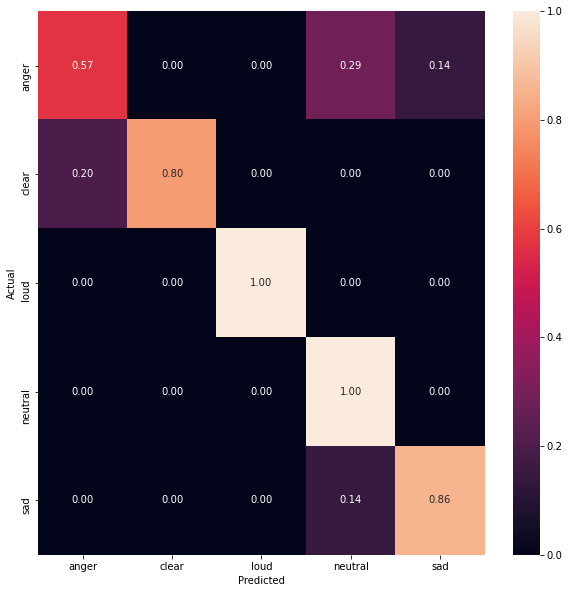

In [18]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
target_names = ['anger', 'clear', 'loud', 'neutral', 'sad']
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       anger       0.57      0.80      0.67         5
       clear       0.80      1.00      0.89         4
        loud       1.00      1.00      1.00         4
     neutral       1.00      0.40      0.57         5
         sad       0.86      0.86      0.86         7

    accuracy                           0.80        25
   macro avg       0.85      0.81      0.80        25
weighted avg       0.84      0.80      0.79        25

